In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import h5py
import tifffile as tiff
from pathlib import Path

# View H5py Files

In [2]:
wellA04_file_path_h5 = Path("CovidGroundTruth/hdf5/data/WellA04_PointA04_0007_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0025.h5")
assert wellA04_file_path_h5.exists()

In [3]:
with h5py.File(wellA04_file_path_h5, 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['cells', 'infected', 'raw']>


In [4]:
with h5py.File(wellA04_file_path_h5, 'r') as f:
    print(f"Raw shape: {f['raw'].shape}")
    print(f"Cells shape: {f['cells'].shape}")
    print(f"Infected shape: {f['infected'].shape}")


Raw shape: (3, 1024, 1024)
Cells shape: (1024, 1024)
Infected shape: (1024, 1024)


In [5]:
with h5py.File(wellA04_file_path_h5, 'r') as f:
    raw = f['raw'][:]
    cells = f['cells'][:]
    infected = f['infected'][:]

In [6]:
print(raw.shape, raw.dtype, type(raw))
print(cells.shape, cells.dtype, type(cells))

(3, 1024, 1024) uint8 <class 'numpy.ndarray'>
(1024, 1024) uint16 <class 'numpy.ndarray'>


# Visualise Raw Data

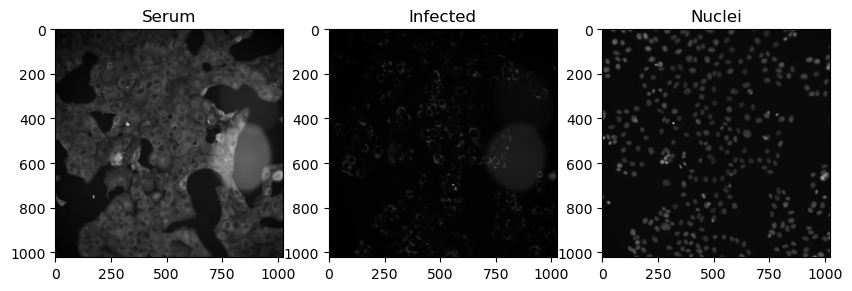

In [7]:
_, axs = plt.subplots(1, 3, figsize=(10, 5))
axs = axs.ravel()
axs[0].imshow(raw[0], cmap='gray')
axs[0].set_title('Serum')
axs[1].imshow(raw[1], cmap='gray')
axs[1].set_title('Infected')
axs[2].imshow(raw[2], cmap='gray')
axs[2].set_title('Nuclei')
plt.show()


# Visualise Ground Truth Labels

In [8]:
def create_color_map(label_image):
    # Get unique labels from the label image
    unique_labels = np.unique(label_image)
    
    # Generate random colors for each unique label, setting background (label 0) to black
    random_colors = np.random.rand(len(unique_labels), 3)
    label_to_color = {label: color for label, color in zip(unique_labels, random_colors)}
    
    # Ensure that label 0 is mapped to black
    if 0 in label_to_color:
        label_to_color[0] = np.array([0, 0, 0])  # Set background to black
    
    # Create a color map using the random colors
    color_list = [label_to_color[label] for label in unique_labels]
    cmap = mcolors.ListedColormap(color_list)
    
    # Normalize the color mapping based on label values
    norm = mcolors.BoundaryNorm(boundaries=unique_labels - 0.5, ncolors=len(unique_labels))
    return cmap, norm
    

In [9]:
cmap, norm = create_color_map(cells)

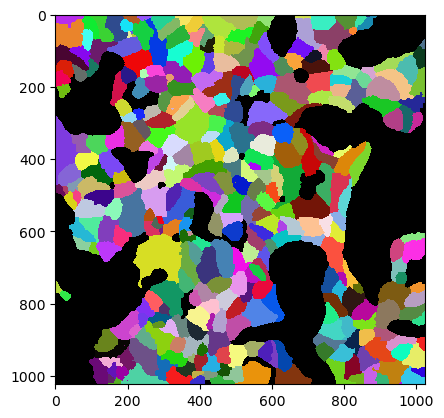

In [10]:
plt.imshow(cells, cmap=cmap, norm=norm, interpolation='nearest')
plt.show()

# View Tiff Files

In [11]:
wellA04_file_path_tif = Path("CovidGroundTruth/tif/data/WellA04_PointA04_0007_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0025.tif")
assert wellA04_file_path_tif.exists()

In [12]:
raw = tiff.imread(wellA04_file_path_tif)

In [13]:
print(raw.shape, raw.dtype, type(raw))

(3, 1024, 1024) uint8 <class 'numpy.ndarray'>


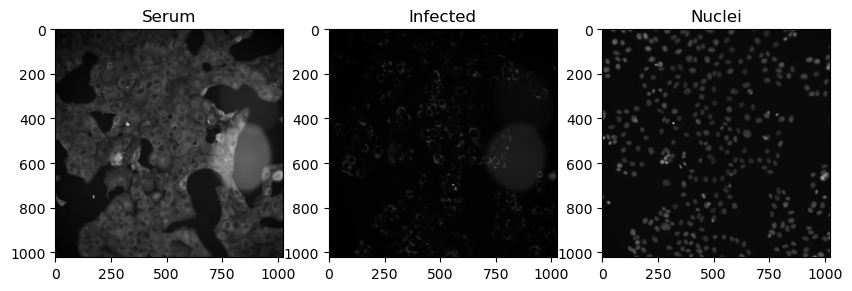

In [14]:
_, axs = plt.subplots(1, 3, figsize=(10, 5))
axs = axs.ravel()
axs[0].imshow(raw[0], cmap='gray')
axs[0].set_title('Serum')
axs[1].imshow(raw[1], cmap='gray')
axs[1].set_title('Infected')
axs[2].imshow(raw[2], cmap='gray')
axs[2].set_title('Nuclei')
plt.show()

# Save Seperate h5 Channels

In [23]:
hdf5_dir_path = Path("CovidGroundTruth/hdf5/data")
for path in hdf5_dir_path.glob("*.h5"):
    print(path.name)
    with h5py.File(path, 'r') as f:
        raw_serum = f['raw'][0:1]
        raw_nuclei = f['raw'][2:3]
    serum_save_path = path.parent / "serum" / f"{path.stem}_serum.h5"
    if not serum_save_path.parent.exists():
        serum_save_path.parent.mkdir()
    nuclei_save_path = path.parent / "nuclei" / f"{path.stem}_nuclei.h5"
    if not nuclei_save_path.parent.exists():
        nuclei_save_path.parent.mkdir()
    with h5py.File(serum_save_path, 'w') as f:
        f.create_dataset('raw', data=raw_serum)
    with h5py.File(nuclei_save_path, 'w') as f:
        f.create_dataset('raw', data=raw_nuclei)

WellE02_PointE02_0000_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0405.h5
WellD11_PointD11_0000_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0270.h5
WellG02_PointG02_0001_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0658.h5
WellG05_PointG05_0001_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0685.h5
WellE05_PointE05_0004_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0454.h5
WellA04_PointA04_0007_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0025.h5


# Save Seperate tiff Channels

In [25]:
tiff_dir_path = Path("CovidGroundTruth/tif/data")
for path in tiff_dir_path.glob("*.tif"):
    print(path.name)
    raw = tiff.imread(path)
    serum_save_path = path.parent / "serum" / f"{path.stem}_serum.tif"
    if not serum_save_path.parent.exists():
        serum_save_path.parent.mkdir()
    nuclei_save_path = path.parent / "nuclei" / f"{path.stem}_nuclei.tif"
    if not nuclei_save_path.parent.exists():
        nuclei_save_path.parent.mkdir()
    tiff.imwrite(serum_save_path, raw[0:1])
    tiff.imwrite(nuclei_save_path, raw[2:3])

WellD11_PointD11_0000_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0270.tif
WellA04_PointA04_0007_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0025.tif
WellE05_PointE05_0004_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0454.tif
WellG02_PointG02_0001_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0658.tif
WellG05_PointG05_0001_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0685.h5.tif
WellE02_PointE02_0000_ChannelDAPI,WF_GFP,TRITC,WF_Cy5,DIA_Seq0405.tif
